## 1. Import data

In [1]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [2]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [3]:
import pandas as pd

pixel = dict()
pixel["label"] = Y_train
for i in range(X_train.shape[1]):
    pixel["pixel " + str(i+1)] = X_train[:,i]
df_train = pd.DataFrame(pixel)
df_train[:5]

,label,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Show data

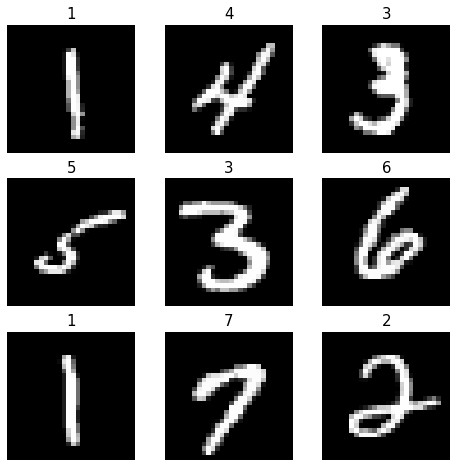

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    plt.imshow(X_train[i + 8].reshape(28, 28), cmap="gray")
    plt.title(Y_train[i + 8], fontsize=15)
    plt.axis("off")
plt.show()

## 2. Principal components analysis with 16 components

In [5]:
from pca import PCA

n_component = 16
pca = PCA(n_components=n_component)
pca.fit(X_train)
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

## Show 16 components

In [6]:
col_names_train = dict()
for i in range(n_component):
    col_names_train["PCs " + str(i + 1)] = pca_train[:, i]

df_train_pca = pd.DataFrame(col_names_train)
df_train_pca["Label"] = Y_train
df_train_pca[:10]

,PCs 1,PCs 2,PCs 3,PCs 4,PCs 5,PCs 6,PCs 7,PCs 8,PCs 9,PCs 10,PCs 11,PCs 12,PCs 13,PCs 14,PCs 15,PCs 16,Label
0,0.922159,-4.814790,-0.067560,8.051329,0.985347,-0.951616,-0.336139,1.393473,1.052314,2.324207,-1.520380,-3.162686,1.183778,-9.200882,4.419723,-1.643308,5
1,-8.708977,-7.754403,3.447910,1.668321,-0.834795,5.144664,0.272279,3.135456,0.198393,-1.196196,-3.251284,1.183846,-1.634733,4.405183,2.924403,1.381109,0
2,-2.328389,9.431338,6.184114,-1.725066,-4.092456,-2.291390,-18.691539,3.992473,-2.170118,-0.151141,-7.383500,-2.030047,0.586541,-0.109484,-11.328976,-10.314627,4
3,6.582173,-3.746318,-3.690851,0.461041,-5.627325,-3.461544,-1.561415,-4.600462,0.624820,-2.617184,-2.046667,-3.941352,0.761777,3.777262,0.963551,-2.207193,1
4,5.183251,3.133297,6.277947,-1.459654,1.608842,0.612565,0.580065,-3.206010,-0.012948,-0.699051,4.812271,-0.123237,0.761199,1.971282,1.472818,0.838972,9
5,-2.198402,-3.068366,0.231257,-2.752601,1.216887,-5.791326,0.693788,0.335576,0.786537,-1.945917,2.753538,1.614422,-1.215571,-0.236623,4.479787,0.455888,2
6,6.773344,0.823079,-2.932370,-0.988512,-1.460365,4.947632,0.143080,0.972309,0.527853,-0.248306,2.743669,1.173407,-0.555294,-4.646503,-2.808747,1.495567,1
7,-1.926909,-5.406264,0.163032,11.153009,5.003720,-5.101921,-0.559796,-1.926869,4.230104,1.010069,0.545531,-1.614506,1.304368,-2.271217,-0.564763,-2.064270,3
8,7.822335,0.191810,-1.100151,-1.559558,-4.221220,5.094354,-0.625061,0.417244,0.070493,1.069038,1.137108,2.647536,-1.240880,-3.480839,-0.772773,-0.520236,1
9,3.227626,-4.726425,4.288980,-3.631201,0.712054,-3.527597,-2.536038,-2.093004,-3.565205,5.520485,-0.568094,1.573917,-1.516880,0.971321,-0.373452,-3.714878,4


## Plot data with 16 components

[0.05646717 0.09724989 0.13464369 0.16349484 0.18870593 0.21064863
 0.22988207 0.24734006 0.26269099 0.27670818 0.29012561 0.30216303
 0.31330873 0.32420796 0.33449446 0.34443932]


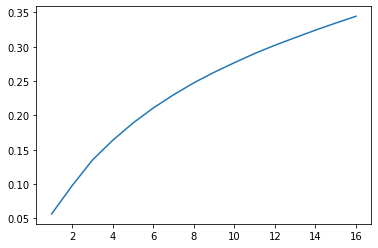

In [7]:
import numpy as np

x = np.arange(1, n_component+1)
y = pca.information_percent()
print(y)
plt.plot(x, y)
plt.show()

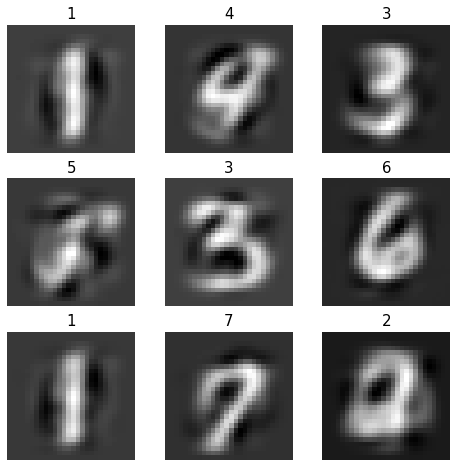

In [8]:
project_data = pca.project_data(X_train)
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    plt.imshow(project_data[i + 8].reshape(28, 28), cmap="gray")
    plt.title(Y_train[i + 8], fontsize=15)
    plt.axis("off")
plt.show()

## 3. Support vector machine

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [10]:
# Save accuracy in each kernel
kernel_accuracy = dict()

<font size="5">**Radial Basic Function - RBF**</font>

In [11]:
rbf = SVC(kernel="rbf")
rbf.fit(pca_train, Y_train)
predict_rbf = rbf.predict(pca_test)
rbf_accuracy = accuracy_score(predict_rbf, Y_test)
kernel_accuracy["RBF"] = rbf_accuracy
rbf_accuracy

0.9527

In [27]:
rbf_predict = dict()
rbf_predict["Predict"] = predict_rbf
rbf_predict["True"] = Y_test

df_rbf = pd.DataFrame(rbf_predict)
df_rbf

,Predict,True
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


<font size="5">**Linear**</font>

In [12]:
linear = SVC(kernel="linear")
linear.fit(pca_train, Y_train)
predict_linear = linear.predict(pca_test)
linear_accuracy = accuracy_score(predict_linear, Y_test)
kernel_accuracy["Linear"] = linear_accuracy
linear_accuracy

0.8909

In [28]:
linear_predict = dict()
linear_predict["Predict"] = predict_linear
linear_predict["True"] = Y_test

df_linear = pd.DataFrame(linear_predict)
df_linear

,Predict,True
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


<font size="5">**Polynomial**</font>

In [13]:
poly = SVC(kernel="poly")
poly.fit(pca_train, Y_train)
predict_poly = poly.predict(pca_test)
poly_accuracy = accuracy_score(predict_poly, Y_test)
kernel_accuracy["Poly"] = poly_accuracy
poly_accuracy

0.945

In [29]:
poly_predict = dict()
poly_predict["Predict"] = predict_poly
poly_predict["True"] = Y_test

df_poly = pd.DataFrame(poly_predict)
df_poly

,Predict,True
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


<font size="5">**Sigmoid**</font>

In [14]:
sigmoid = SVC(kernel="sigmoid")
sigmoid.fit(pca_train, Y_train)
predict_sigmoid = sigmoid.predict(pca_test)
sigmoid_accuracy = accuracy_score(predict_sigmoid, Y_test)
kernel_accuracy["Sigmoid"] = sigmoid_accuracy
sigmoid_accuracy

0.6912

In [30]:
sigmoid_predict = dict()
sigmoid_predict["Predict"] = predict_sigmoid
sigmoid_predict["True"] = Y_test

df_sigmoid = pd.DataFrame(sigmoid_predict)
df_sigmoid

,Predict,True
0,7,7
1,0,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,8,5


## All accuracy of each kernels

In [15]:
for kernel, accuracy in kernel_accuracy.items():
    print("kernel %s: %f" % (kernel, accuracy))

kernel RBF: 0.952700
kernel Linear: 0.890900
kernel Poly: 0.945000
kernel Sigmoid: 0.691200


## 4. Try with different number components

In [16]:
n_components = [2, 5, 10, 20]

### Radial Basic Function

In [17]:
for i in range(len(n_components)):
    pcs = PCA(n_components=n_components[i])
    pcs.fit(X_train)
    pcs_train = pcs.transform(X_train)
    pcs_test = pcs.transform(X_test)
    svm = SVC(kernel="rbf")
    svm.fit(pcs_train, Y_train)
    predict_ = svm.predict(pcs_test)
    print("with {:d}: {:f}".format(n_components[i], accuracy_score(predict_, Y_test)))    

with 2: 0.364600
with 5: 0.766300
with 10: 0.926500
with 20: 0.962300


### Linear

In [18]:
for i in range(len(n_components)):
    pcs = PCA(n_components=n_components[i])
    pcs.fit(X_train)
    pcs_train = pcs.transform(X_train)
    pcs_test = pcs.transform(X_test)
    svm = SVC(kernel="linear")
    svm.fit(pcs_train, Y_train)
    predict_ = svm.predict(pcs_test)
    print("with {:d}: {:f}".format(n_components[i], accuracy_score(predict_, Y_test)))  

with 2: 0.336700
with 5: 0.705000
with 10: 0.845300
with 20: 0.901000


### Sigmoid

In [19]:
for i in range(len(n_components)):
    pcs = PCA(n_components=n_components[i])
    pcs.fit(X_train)
    pcs_train = pcs.transform(X_train)
    pcs_test = pcs.transform(X_test)
    svm = SVC(kernel="sigmoid")
    svm.fit(pcs_train, Y_train)
    predict_ = svm.predict(pcs_test)
    print("with {:d}: {:f}".format(n_components[i], accuracy_score(predict_, Y_test)))  

with 2: 0.235900
with 5: 0.493700
with 10: 0.627900
with 20: 0.716300


### Polynomial

In [20]:
for i in range(len(n_components)):
    pcs = PCA(n_components=n_components[i])
    pcs.fit(X_train)
    pcs_train = pcs.transform(X_train)
    pcs_test = pcs.transform(X_test)
    svm = SVC(kernel="poly")
    svm.fit(pcs_train, Y_train)
    predict_ = svm.predict(pcs_test)
    print("with {:d}: {:f}".format(n_components[i], accuracy_score(predict_, Y_test)))  

with 2: 0.332400
with 5: 0.740500
with 10: 0.913400
with 20: 0.955200
